EECS 491 - Assignment 1

1.Whatʼs the data and hidden parameter (or representation) in you problem?
I download from a dataset that including two attributes:sepal length and sepal width.
The hidden parameter is the type of iris. In order to make the problem simply, I mark class=1 (Iris Setosa), class =2 (Iris Versicolour)  and class =3(Iris Virginica). So the hidden parameter has three value:  C=1, C=2 and C=3. 

2.Whatʼs the generative process in your model (how the data in you model
generated) and how to generate random data with program?
The dataset I download is not random, the order is the classification of three types iris.
Then I make the data randomly, and get 100 of them to make the iris_data.csv.

3.Whatʼs the prior, likelihood, and posterior in your model?
The prior is the probability of the three types iris in 100 examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
iris=pd.read_csv('iris_data.csv')
iris=pd.DataFrame(iris)

In [8]:
def prior_class(df):
    count1=0
    count2=0
    count3=0
    for i in range (len(df)):
        if df.iloc[i,2]==1:
            count1=count1+1
        elif df.iloc[i,2]==2:
            count2=count2+1
        elif df.iloc[i,2]==3:
            count3=count3+1
    prior1=count1/100
    prior2=count2/100
    prior3=count3/100
    fig=plt.figure()
    ax=fig.add_subplot(121)
    data=np.array([prior1,prior2,prior3])
    width=0.3
    x_bar=np.arange(3)
    rect=ax.bar(x=x_bar,height=data,width=width)
    ax.set_xticks(x_bar)
    ax.set_xticklabels(("1","2","3"))
    plt.show()
    print('prior of class 1 (Iris Setosa)is prior_1:',prior1) 
    print('prior of class 2 (Iris Versicolour) is prior_2:',prior2) 
    print('prior of class 3 (Iris Virginica) is prior_3:',prior3) 
    prior=[prior1,prior2,prior3]
    return prior

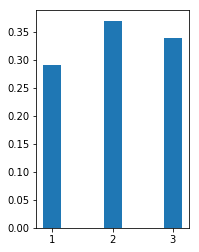

prior of class 1 (Iris Setosa)is prior_1: 0.29
prior of class 2 (Iris Versicolour) is prior_2: 0.37
prior of class 3 (Iris Virginica) is prior_3: 0.34


In [9]:
prior=prior_class(iris)

So the prior:
P(C=1)=0.29
P(C=2)=0.37
P(C=3)=0.34

The likelihood is kind of complex.
There are two attributes of each type iris. I divide the first attribute (sepal length) into three parts: length<=5, 5<length<=7 and length >7. 
Then I divide second attribute into two parts: width>=3 and width <3. 
The likelihood is : 
P(a1<=5|C=1), P(5<a1<=7|C=1), P(a1>7|C=1), 
P(a1<=5|C=2), P(5<a1<=7|C=2), P(a1>7|C=2), 
P(a1<=5|C=3), P(5<a1<=7|C=3), P(a1>7|C=3), 
P(a1<=3|C=1), P(a1>3|C=1),
P(a1<=3|C=2), P(a1>3|C=2),
P(a1<=3|C=3), P(a1>3|C=3)

After training the data, I randomly select a iris from the left data of original dataset.
I will get the two attributes a1,a2 of the new iris.
The posterior is :
P(C|a1,a2) 

4.How to calculate the likelihood with program?
In each type of iris, I use program to count how many iris in each part of a1,a2.
Then make a division to get the likelihood. 

In [11]:
def count_attribute1(df,prior):
    count1_a1_1=0
    count1_a1_2=0
    count1_a1_3=0
    count2_a1_1=0
    count2_a1_2=0
    count2_a1_3=0
    count3_a1_1=0
    count3_a1_2=0
    count3_a1_3=0
    for i in range(len(df)):
        if df.iloc[i,2]==1:
            if (df.iloc[i,0]<=5):
                count1_a1_1=count1_a1_1+1
            elif (df.iloc[i,0]>5)&(df.iloc[i,0]<=7):
                count1_a1_2=count1_a1_2+1
            elif (df.iloc[i,0]>7):
                count1_a1_3=count1_a1_3+1
        if df.iloc[i,2]==2:
            if (df.iloc[i,0]<=5):
                count2_a1_1=count2_a1_1+1
            elif (df.iloc[i,0]>5)&(df.iloc[i,0]<=7):
                count2_a1_2=count2_a1_2+1
            elif (df.iloc[i,0]>7):
                count2_a1_3=count2_a1_3+1
        if df.iloc[i,2]==3:
            if (df.iloc[i,0]<=5):
                count3_a1_1=count3_a1_1+1
            elif (df.iloc[i,0]>5)&(df.iloc[i,0]<=7):
                count3_a1_2=count3_a1_2+1
            elif (df.iloc[i,0]>7):
                count3_a1_3=count3_a1_3+1
    count1_a1_1=count1_a1_1/(prior[0]*100)
    count1_a1_2=count1_a1_2/(prior[0]*100)
    count1_a1_3=count1_a1_3/(prior[0]*100)
    count2_a1_1=count2_a1_1/(prior[1]*100)
    count2_a1_2=count2_a1_2/(prior[1]*100)
    count2_a1_3=count2_a1_3/(prior[1]*100)
    count3_a1_1=count3_a1_1/(prior[2]*100)
    count3_a1_2=count3_a1_2/(prior[2]*100)
    count3_a1_3=count3_a1_3/(prior[2]*100)
    likelihood_count1_a1_1=round(count1_a1_1,2)
    likelihood_count1_a1_2=round(count1_a1_2,2)
    likelihood_count1_a1_3=round(count1_a1_3,2)
    likelihood_count2_a1_1=round(count2_a1_1,2)
    likelihood_count2_a1_2=round(count2_a1_2,2)
    likelihood_count2_a1_3=round(count2_a1_3,2)
    likelihood_count3_a1_1=round(count3_a1_1,2)
    likelihood_count3_a1_2=round(count3_a1_2,2)
    likelihood_count3_a1_3=round(count3_a1_3,2)
    print('likelihood_count1_a1_1',likelihood_count1_a1_1)
    print('likelihood_count1_a1_2',likelihood_count1_a1_2)
    print('likelihood_count1_a1_3',likelihood_count1_a1_3)
    print('likelihood_count2_a1_1',likelihood_count2_a1_1)
    print('likelihood_count2_a1_2',likelihood_count2_a1_2)
    print('likelihood_count2_a1_3',likelihood_count2_a1_3)
    print('likelihood_count3_a1_1',likelihood_count3_a1_1)
    print('likelihood_count3_a1_2',likelihood_count3_a1_2)
    print('likelihood_count3_a1_3',likelihood_count3_a1_3)
    likelihood_a1=[likelihood_count1_a1_1,likelihood_count1_a1_2,likelihood_count1_a1_3,likelihood_count2_a1_1,likelihood_count2_a1_2,likelihood_count2_a1_3,likelihood_count3_a1_1,likelihood_count3_a1_2,likelihood_count3_a1_3]
    return likelihood_a1       

In [12]:
def count_attribute2(df,prior):
    count1_a2_1=0
    count1_a2_2=0
    count2_a2_1=0
    count2_a2_2=0
    count3_a2_1=0
    count3_a2_2=0
    for i in range(len(df)):
        if df.iloc[i,2]==1:
            if (df.iloc[i,1]<=3):
                count1_a2_1=count1_a2_1+1
            elif (df.iloc[i,1]>3):
                count1_a2_2=count1_a2_2+1
        if df.iloc[i,2]==2:
            if (df.iloc[i,1]<=3):
                count2_a2_1=count2_a2_1+1
            elif (df.iloc[i,1]>3):
                count2_a2_2=count2_a2_2+1
        if df.iloc[i,2]==3:
            if (df.iloc[i,1]<=3):
                count3_a2_1=count3_a2_1+1
            elif (df.iloc[i,1]>3):
                count3_a2_2=count3_a2_2+1
    count1_a2_1=count1_a2_1/(prior[0]*100)
    count1_a2_2=count1_a2_2/(prior[0]*100)
    count2_a2_1=count2_a2_1/(prior[1]*100)
    count2_a2_2=count2_a2_2/(prior[1]*100)
    count3_a2_1=count3_a2_1/(prior[2]*100)
    count3_a2_2=count3_a2_2/(prior[2]*100)
    likelihood_count1_a2_1=round(count1_a2_1,2)
    likelihood_count1_a2_2=round(count1_a2_2,2)
    likelihood_count2_a2_1=round(count2_a2_1,2)
    likelihood_count2_a2_2=round(count2_a2_2,2)
    likelihood_count3_a2_1=round(count3_a2_1,2)
    likelihood_count3_a2_2=round(count3_a2_2,2)
    print('likelihood_count1_a2_1',likelihood_count1_a2_1)
    print('likelihood_count1_a2_2',likelihood_count1_a2_2)
    print('likelihood_count2_a2_1',likelihood_count2_a2_1)
    print('likelihood_count2_a2_2',likelihood_count2_a2_2)
    print('likelihood_count3_a2_1',likelihood_count3_a2_1)
    print('likelihood_count3_a2_2',likelihood_count3_a2_2)
    likelihood_a2=[likelihood_count1_a2_1,likelihood_count1_a2_2,likelihood_count2_a2_1,likelihood_count2_a2_2,likelihood_count3_a2_1,likelihood_count3_a2_2]
    return likelihood_a2

The results of all likelihood:

In [20]:
likelihood_a1=count_attribute1(iris,prior)
likelihood_a2=count_attribute2(iris,prior)

likelihood_count1_a1_1 0.55
likelihood_count1_a1_2 0.45
likelihood_count1_a1_3 0.0
likelihood_count2_a1_1 0.08
likelihood_count2_a1_2 0.92
likelihood_count2_a1_3 0.0
likelihood_count3_a1_1 0.0
likelihood_count3_a1_2 0.74
likelihood_count3_a1_3 0.26
likelihood_count1_a2_1 0.14
likelihood_count1_a2_2 0.86
likelihood_count2_a2_1 0.86
likelihood_count2_a2_2 0.14
likelihood_count3_a2_1 0.62
likelihood_count3_a2_2 0.38


5.How to calculate the posterior with program?
$$ P(C \mid a1,a2) = \frac{P(a1,a2 \mid C)P(C)}{P(a1,a2)} $$
In the three types iris, the P(a1,a2) are same, so we only need to compare:
$$ P(C \mid a1,a2) =P(a1,a2 \mid C)P(C)$$

6.With a given data sample, whatʼs the posterior distribution looks like, and whatʼs the best estimation of hidden parameter.  
Here is the first example I select :                             
sepal length: 5.3
sepal width: 3.7  
Then start to calculate the posterior of three type iris. 

In [15]:
def posterior_1(a,b,prior,likelihood_a1,likelihood_a2):
    if (a<=5):
        prior_a1=likelihood_a1[0]
    elif (a>5)&(a<=7):
            prior_a1=likelihood_a1[1]
    elif (a>7):
            prior_a1=likelihood_a1[2]
    if(b<=3):
        prior_a2=likelihood_a2[0]
    elif (b>3):
        prior_a2=likelihood_a2[1]
    posterior = prior[0]*prior_a1*prior_a2
    posterior=round(posterior,2)
    print(posterior)
    return posterior        

In [16]:
def posterior_2(a,b,prior,likelihood_a1,likelihood_a2):
    if (a<=5):
        prior_a1=likelihood_a1[3]
    elif (a>5)&(a<=7):
            prior_a1=likelihood_a1[4]
    elif (a>7):
            prior_a1=likelihood_a1[5]
    if(b<=3):
        prior_a2=likelihood_a2[2]
    elif (b>3):
        prior_a2=likelihood_a2[3]
    posterior = prior[1]*prior_a1*prior_a2
    posterior=round(posterior,2)
    print(posterior)
    return posterior   

In [17]:
def posterior_3(a,b,prior,likelihood_a1,likelihood_a2):
    if (a<=5):
        prior_a1=likelihood_a1[6]
    elif (a>5)&(a<=7):
            prior_a1=likelihood_a1[7]
    elif (a>7):
            prior_a1=likelihood_a1[8]
    if(b<=3):
        prior_a2=likelihood_a2[4]
    elif (b>3):
        prior_a2=likelihood_a2[5]
    posterior = prior[2]*prior_a1*prior_a2
    posterior=round(posterior,2)
    print(posterior)
    return posterior

In [29]:
c1=posterior_1(5.3,3.7,prior,likelihood_a1,likelihood_a2)
c2=posterior_2(5.3,3.7,prior,likelihood_a1,likelihood_a2)
c3=posterior_3(5.3,3.7,prior,likelihood_a1,likelihood_a2)

0.11
0.05
0.1


Then draw the distribution: 

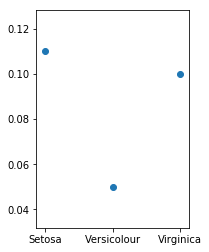

In [30]:
fig=plt.figure()
ax=fig.add_subplot(121)
data=np.array([c1,c2,c3])
x=np.arange(3)
ax.scatter(x=x,y=data)
ax.set_xticks(x)
ax.set_xticklabels(("Setosa","Versicolour","Virginica"))
plt.show()

According to the distribution, the best estimation of hidden parameter is c=1, the iris I selected is Setosa.

7.if you use repeating test and take multiple samples, how does the posterior distribution evolves in the progress?  
I select another new iris:  
sepal length: 6.1 sepal width: 2.9

In [31]:
d1=posterior_1(6.1,2.9,prior,likelihood_a1,likelihood_a2)
d2=posterior_2(6.1,2.9,prior,likelihood_a1,likelihood_a2)
d3=posterior_3(6.1,2.9,prior,likelihood_a1,likelihood_a2)

0.02
0.29
0.16


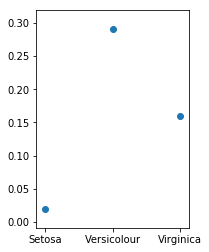

In [32]:
fig=plt.figure()
ax=fig.add_subplot(121)
data=np.array([d1,d2,d3])
x=np.arange(3)
ax.scatter(x=x,y=data)
ax.set_xticks(x)
ax.set_xticklabels(("Setosa","Versicolour","Virginica"))
plt.show()

According to the distribution of second selected iris, the best estimation of hidden parameter is c=1, the iris I selected is Setosa.

In [34]:
e1=posterior_1(7.7,3,prior,likelihood_a1,likelihood_a2)
e2=posterior_2(7.7,3,prior,likelihood_a1,likelihood_a2)
e3=posterior_3(7.7,3,prior,likelihood_a1,likelihood_a2)

0.0
0.0
0.05


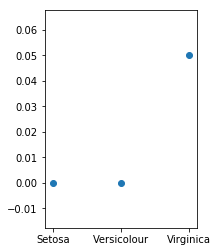

In [35]:
fig=plt.figure()
ax=fig.add_subplot(121)
data=np.array([e1,e2,e3])
x=np.arange(3)
ax.scatter(x=x,y=data)
ax.set_xticks(x)
ax.set_xticklabels(("Setosa","Versicolour","Virginica"))
plt.show()

According to the distribution of third selected iris, the best estimation of hidden parameter is c=1, the iris I selected is Setosa.

More thought: According to the iris I selected, the classification all classifies them into correct class. But I find that because of the parts of each attribute, the posterior always be some constant values. So I think I should add more attribute and divide each attribute into more parts. That will cause the classification more accurate.